In [1]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from config import weather_key
from scipy.stats import linregress
from citipy import citipy
import json

In [2]:
# save config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# building partial query url
query_url = f'{url}appid={weather_key}&units={units}&q='

In [3]:
# range of latitude and longitude
lat = (-90,90)
lng = (-180,180)

# define count to pass through
count = 0
set_counter = 0

In [4]:
# list to hold cities and coordinates
cities = []
latutides_longitudes = []


# using uniform distribution, create a set of random latitudes and longitudes
latitudes = np.random.uniform(low=-90.0000, high=90.0000, size=1500)
longitudes = np.random.uniform(low=-180.0000, high=180.0000, size=1500)
latitudes_longitudes = zip(latitudes, longitudes)

# identify nearest city for each coordinates combination
for lat_lng in latitudes_longitudes:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities: # only add to list if the city found is unique
        cities.append(city)
        
#print(cities)
#len(cities)

# get a glimpse of the json print for df variable creation
response = requests.get(query_url+city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {
        "lat": -8.103,
        "lon": 156.8419
    },
    "dt": 1655716024,
    "id": 2108857,
    "main": {
        "feels_like": 86.56,
        "grnd_level": 1007,
        "humidity": 74,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 81.63,
        "temp_max": 81.63,
        "temp_min": 81.63
    },
    "name": "Gizo Government Station",
    "rain": {
        "1h": 0.11
    },
    "sys": {
        "country": "SB",
        "sunrise": 1655667873,
        "sunset": 1655709814
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 104,
        "gust": 4.97,
        "speed": 4.03
    }
}


#  API calls

In [5]:
# set empty lists of variables for df creation 
# info = 0
citi = []
latitudes = []
longitudes = []
cloudiness = []
humidity = []
temperatures = []
windspeed = []
country = []
city_name = []
date = []


print('Beginning data retrieval\n----------------------------')
# loop through url info to generate dataframe columns
for city in cities:
    
    # create search query
    response = requests.get(query_url + city).json()
    try:
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temperatures.append(response['main']['temp'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
        if count < 50: 
            count = 1
            set_counter += 1
            citi.append(city)
        else:
            count = 1
            set_counter += 1
        print(f'Processing record {count} for set {set_counter} | {city}')
    except Exception:
        print(f'City not found. Skipping...')
print('----------\nData retrieval complete:)\n-----------')

Beginning data retrieval
----------------------------
City not found. Skipping...
Processing record 1 for set 1 | cape town
Processing record 1 for set 2 | mar del plata
Processing record 1 for set 3 | gamba
Processing record 1 for set 4 | eureka
Processing record 1 for set 5 | mataura
Processing record 1 for set 6 | kolondieba
Processing record 1 for set 7 | umm lajj
Processing record 1 for set 8 | miahuatlan
Processing record 1 for set 9 | port elizabeth
Processing record 1 for set 10 | munirabad
Processing record 1 for set 11 | muriti
Processing record 1 for set 12 | kruisfontein
Processing record 1 for set 13 | juneau
Processing record 1 for set 14 | kerema
Processing record 1 for set 15 | guerrero negro
Processing record 1 for set 16 | ilulissat
Processing record 1 for set 17 | castro
Processing record 1 for set 18 | hermanus
Processing record 1 for set 19 | bredasdorp
Processing record 1 for set 20 | new norfolk
Processing record 1 for set 21 | shitanjing
Processing record 1 for 

Processing record 1 for set 181 | kaitangata
Processing record 1 for set 182 | cap malheureux
Processing record 1 for set 183 | avera
Processing record 1 for set 184 | christchurch
Processing record 1 for set 185 | hirara
Processing record 1 for set 186 | bambous virieux
Processing record 1 for set 187 | broken hill
Processing record 1 for set 188 | creston
City not found. Skipping...
Processing record 1 for set 189 | canico
Processing record 1 for set 190 | jumla
Processing record 1 for set 191 | portland
City not found. Skipping...
Processing record 1 for set 192 | el alto
Processing record 1 for set 193 | broome
Processing record 1 for set 194 | ribeira grande
Processing record 1 for set 195 | boone
Processing record 1 for set 196 | high level
Processing record 1 for set 197 | kushiro
Processing record 1 for set 198 | aasiaat
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record 1 for set 199 | price
Processing record 1 for set 200 | p

Processing record 1 for set 359 | clinton
Processing record 1 for set 360 | pundaguitan
Processing record 1 for set 361 | port lincoln
Processing record 1 for set 362 | la ronge
Processing record 1 for set 363 | amahai
Processing record 1 for set 364 | pathein
Processing record 1 for set 365 | coihaique
Processing record 1 for set 366 | fillan
Processing record 1 for set 367 | ayagoz
Processing record 1 for set 368 | brae
Processing record 1 for set 369 | muros
Processing record 1 for set 370 | kandalaksha
City not found. Skipping...
Processing record 1 for set 371 | batticaloa
Processing record 1 for set 372 | qinhuangdao
Processing record 1 for set 373 | berlevag
Processing record 1 for set 374 | burnie
Processing record 1 for set 375 | novyy urgal
Processing record 1 for set 376 | fortuna
City not found. Skipping...
Processing record 1 for set 377 | waipawa
Processing record 1 for set 378 | lazaro cardenas
Processing record 1 for set 379 | aktau
Processing record 1 for set 380 | yul

City not found. Skipping...
Processing record 1 for set 536 | wegrow
Processing record 1 for set 537 | inirida
City not found. Skipping...
Processing record 1 for set 538 | nha trang
Processing record 1 for set 539 | margate
Processing record 1 for set 540 | axim
Processing record 1 for set 541 | manavalakurichi
Processing record 1 for set 542 | fukue
Processing record 1 for set 543 | cozumel
Processing record 1 for set 544 | port townsend
Processing record 1 for set 545 | namibe
Processing record 1 for set 546 | manuk mangkaw
Processing record 1 for set 547 | cabedelo
Processing record 1 for set 548 | tornio
Processing record 1 for set 549 | la union
Processing record 1 for set 550 | kiomboi
Processing record 1 for set 551 | trogir
Processing record 1 for set 552 | flinders
Processing record 1 for set 553 | kherson
Processing record 1 for set 554 | cabo san lucas
Processing record 1 for set 555 | guanare
Processing record 1 for set 556 | jorochito
Processing record 1 for set 557 | dep

## Dataframe creation and cleaning

In [6]:
# create dictionary 
info_df = pd.DataFrame({
    'City': citi,
    'Country':country,
    'Latitude':latitudes,
    'Longitude':longitudes,
    'Humidity':humidity,
    'Windspeed':windspeed,
    'Cloudiness':cloudiness,
    'Temperatures':temperatures,
    'Date':date
})
info_df.head()

# save the csv
#info_df.to_csv('weather_df', encoding='utf-8',index=False)

,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
0,cape town,ZA,-33.9258,18.4232,59,11.50,0,60.78,1655716029
1,mar del plata,AR,-38.0023,-57.5575,91,4.61,67,39.04,1655716029
2,gamba,GA,-2.6500,10.0000,71,9.78,90,75.79,1655716030
3,eureka,US,40.8021,-124.1637,81,3.00,100,54.50,1655716030
4,mataura,NZ,-46.1927,168.8643,97,2.28,1,40.48,1655716030


In [7]:
# get summary statistics
info_df.describe()

,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.292727,18.364450,70.826549,8.060531,58.833628,68.077558,1.655716e+09
std,32.549839,92.287763,21.106241,5.388830,39.559865,15.336011,9.250735e+01
min,-54.800000,-179.166700,1.000000,0.000000,0.000000,26.190000,1.655716e+09
25%,-6.264100,-63.903900,59.000000,3.910000,17.000000,57.020000,1.655716e+09
50%,22.200600,22.016300,75.000000,6.910000,74.000000,70.830000,1.655716e+09
75%,46.433300,105.157800,88.000000,11.500000,100.000000,79.770000,1.655716e+09
max,78.218600,179.316700,100.000000,48.990000,100.000000,104.940000,1.655716e+09


In [8]:
# remove cities with humidity >100
# info_df['Humidity'].value_counts()
humidity_check = info_df.sort_values('Humidity', ascending=False)
print('No values >100 in humidity, thus plot!')
humidity_check.head()

No values >100 in humidity, thus plot!


,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
336,roura,GF,4.7263,-52.3274,100,2.30,100,73.31,1655716127
541,fukue,JP,32.6881,128.8419,100,6.91,75,73.76,1655716189
514,iquitos,PE,-3.7481,-73.2472,100,0.00,20,71.64,1655716182
152,north bend,US,43.4065,-124.2243,100,3.44,75,51.64,1655716074
474,miles city,US,46.4083,-105.8406,100,6.91,0,56.37,1655716172


In [9]:
info_df.dtypes

City             object
Country          object
Latitude        float64
Longitude       float64
Humidity          int64
Windspeed       float64
Cloudiness        int64
Temperatures    float64
Date              int64
dtype: object

## Plotting scatterplots

In southern hemisphere lat < 0: There is a positive correlation of temperatures to latitude
In northern hemisphere lat > 0: There is a negative correlation of temperatures to latitude


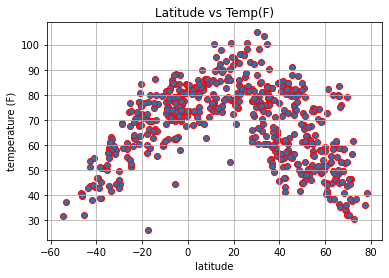

In [10]:
# create temp vs lat scatter
y1= info_df['Temperatures']
x1= info_df['Latitude']
plt.scatter(x1,y1, marker='o',edgecolors='red')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
plt.savefig('temp_vs_lat.png')
plt.show
print('In southern hemisphere lat < 0: There is a positive correlation of temperatures to latitude')
print('In northern hemisphere lat > 0: There is a negative correlation of temperatures to latitude')


There is no correlation detected between latitude and humidity


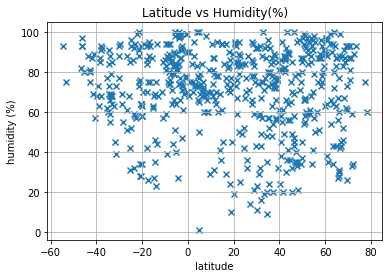

In [11]:
# create humidity vs lat scatter
x2= info_df['Latitude']
y2= info_df['Humidity']
plt.scatter(x2,y2, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title('Latitude vs Humidity(%)')
plt.savefig('hum_vs_lat.png')
plt.show
print('There is no correlation detected between latitude and humidity')

There is no correlation detected between latitude and cloudiness


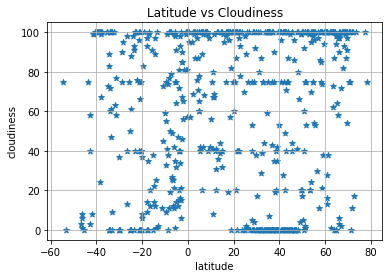

In [12]:
# create cloudiness vs lat scatter
x3= info_df['Latitude']
y3= info_df['Cloudiness']
plt.scatter(x3,y3, marker='*')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Latitude vs Cloudiness')
plt.savefig('cloud_vs_lat.png')
plt.show
print('There is no correlation detected between latitude and cloudiness')

There is no correlation detected between latitude and windspeed


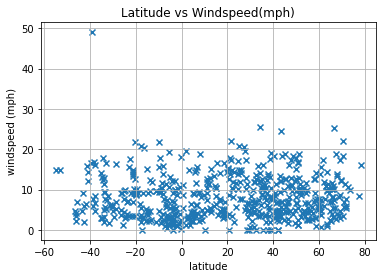

In [13]:
# create windspeed vs lat scatter
x4= info_df['Latitude']
y4= info_df['Windspeed']
plt.scatter(x4,y4, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
plt.savefig('wind_vs_lat.png')
plt.show
print('There is no correlation detected between latitude and windspeed')

## Linear Regression

### Northern Hemisphere

In [14]:
# using original dataframe create a northern hemisphere dataframe 
# in this case latitude will be > 0
# equator = 0
northern_hem_df = info_df[info_df['Latitude']>0]
northern_hem_df.head()
# save csv
northern_hem_df.to_csv('northern hemisphere df', encoding='utf-8', index=False)

The r-squared is: 0.4426995109177954


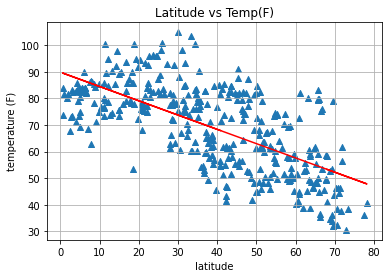

Negative correlation btwn temp and latitude; the higher you go the cooler it becomes
having A 60% variability indicates that the variability is indicated by the target variable is explained by regression


In [15]:
# linregress temp vs lat on scatter
yn1= northern_hem_df['Temperatures']
xn1= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn1, yn1)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn1,yn1, marker='^')
plt.plot(xn1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNtemp_vs_lat.png')
plt.show()
print('Negative correlation btwn temp and latitude; the higher you go the cooler it becomes')
print('having A 60% variability indicates that the variability is indicated by the target variable is explained by regression')

The r-squared is: 0.00012541485192269817


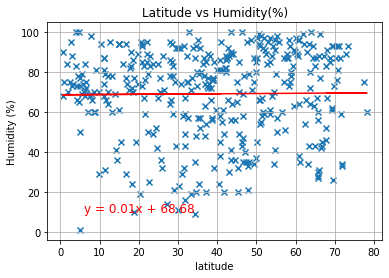

Due a high r-squared value this regression model does not explain the observed data


In [16]:
# linregress humidity vs lat on scatter
yn2= northern_hem_df['Humidity']
xn2= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn2, yn2)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn2,yn2, marker='x')
plt.plot(xn2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNhum_vs_lat.png')
plt.show()
print('Due a high r-squared value this regression model does not explain the observed data')

The r-squared is: 6.263685752853095e-05


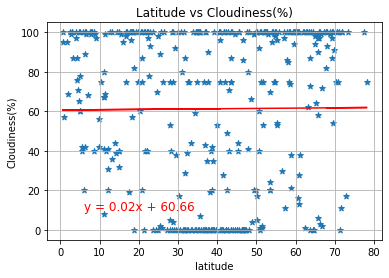

low r-squared minimize the predictive model considering the high dataset used


In [17]:
# linregress cloudiness vs lat on scatter
yn3= northern_hem_df['Cloudiness']
xn3= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn3, yn3)
regress_values = xn3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn3,yn3, marker='*')
plt.plot(xn3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNcloud_vs_lat.png')
plt.show()
print('low r-squared minimize the predictive model considering the high dataset used')

The r-squared is: 0.0009153951152681742


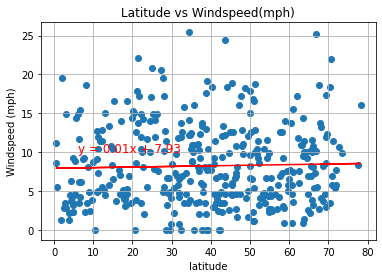

having a 10% variability indicates that the variability is relatively low but indicates more variability


In [18]:
# linregress windspeed vs lat on scatter
yn4= northern_hem_df['Windspeed']
xn4= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn4, yn4)
regress_values = xn4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn4,yn4, marker='o')
plt.plot(xn4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNwind_vs_lat.png')
plt.show()
print('having a 10% variability indicates that the variability is relatively low but indicates more variability')

### Southern Hemisphere

In [19]:
# using original dataframe create a southern hemisphere dataframe 
# in this case latitude will be < 0
# equator = 0
southern_hem_df = info_df[info_df['Latitude']<0]
southern_hem_df.head()
southern_hem_df.to_csv('southern hemisphere df', encoding='utf-8', index=False)

The r-squared is: 0.602950871590446


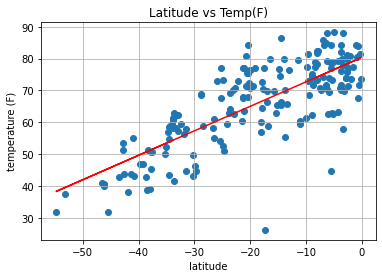

Positive correlation btwn temp and latitude; the further you go from equator the cooler it becomes
having A 70% variability indicates that the variability is indicated by the target variable is explained by regression


In [20]:
# linregress temp vs lat on scatter
ys1= southern_hem_df['Temperatures']
xs1= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs1, ys1)
regress_values = xs1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs1,ys1, marker='o')
plt.plot(xs1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regStemp_vs_lat.png')
plt.show()
print('Positive correlation btwn temp and latitude; the further you go from equator the cooler it becomes')
print('having A 70% variability indicates that the variability is indicated by the target variable is explained by regression')

The r-squared is: 0.00511513804314256


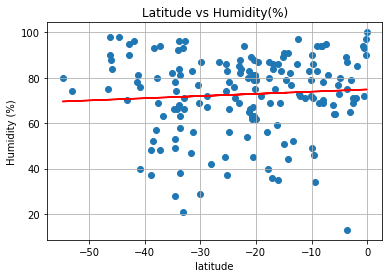

In [20]:
# linregress humidity vs lat on scatter
ys2= southern_hem_df['Humidity']
xs2= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs2, ys2)
regress_values = xs2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs2,ys2, marker='o')
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regShum_vs_lat.png')
plt.show()

The r-squared is: 0.007336613536238908


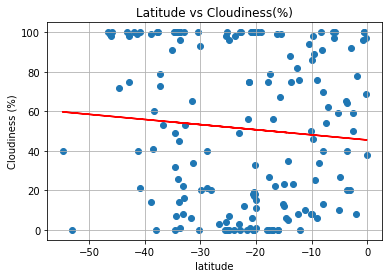

In [21]:
# linregress Cloudiness vs lat on scatter
ys3= southern_hem_df['Cloudiness']
xs3= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs3, ys3)
regress_values = xs3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs3,ys3, marker='o')
plt.plot(xs3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regScloud_vs_lat.png')
plt.show()

The r-squared is: 0.03319408451937119


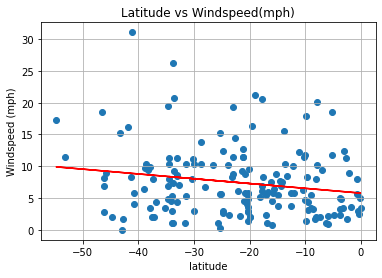

In [22]:
# linregress windspeed vs lat on scatter
ys4= southern_hem_df['Windspeed']
xs4= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs4, ys4)
regress_values = xs4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs4,ys4, marker='o')
plt.plot(xs4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regSwind_vs_lat.png')
plt.show()